In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import numpy as np

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sn

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

In [2]:
import csv

In [3]:
pm = pd.read_csv('https://raw.githubusercontent.com/yujingDING/qm_assignment/main/qm6.csv')

In [4]:
pm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     86 non-null     int64  
 1   month                    86 non-null     object 
 2   electricity_consumption  86 non-null     float64
 3   avg_temp                 86 non-null     float64
 4   total_rainfall           86 non-null     float64
 5   unemployment_rate        86 non-null     float64
 6   electricity_prices       86 non-null     float64
 7   avg_daylight             86 non-null     float64
 8   GDP_index                86 non-null     float64
 9   Unnamed: 9               0 non-null      float64
dtypes: float64(8), int64(1), object(1)
memory usage: 6.8+ KB


In [5]:
pm.head()

,year,month,electricity_consumption,avg_temp,total_rainfall,unemployment_rate,electricity_prices,avg_daylight,GDP_index,Unnamed: 9
0,2015,January,29.8700,4.7800,239.7800,5.7000,39.8600,37.3000,91.3000,NaN
1,2015,February,27.3700,4.2900,114.9800,5.6000,42.8600,84.4000,91.6000,NaN
2,2015,March,28.3500,6.3300,168.0300,5.5000,40.9100,116.6000,91.8000,NaN
3,2015,April,25.1800,9.0900,75.4300,5.5000,43.9700,211.8000,92.3000,NaN
4,2015,May,24.7500,10.8600,153.5100,5.6000,41.2100,173.8000,92.1000,NaN


In [6]:
#将object的字段改为虚拟变量
pm_numeric = pd.get_dummies(pm)

In [7]:
pm_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     86 non-null     int64  
 1   electricity_consumption  86 non-null     float64
 2   avg_temp                 86 non-null     float64
 3   total_rainfall           86 non-null     float64
 4   unemployment_rate        86 non-null     float64
 5   electricity_prices       86 non-null     float64
 6   avg_daylight             86 non-null     float64
 7   GDP_index                86 non-null     float64
 8   Unnamed: 9               0 non-null      float64
 9   month_April              86 non-null     uint8  
 10  month_August             86 non-null     uint8  
 11  month_December           86 non-null     uint8  
 12  month_February           86 non-null     uint8  
 13  month_January            86 non-null     uint8  
 14  month_July               86 

In [8]:
#手动剔除每种类别种的一个哑变量，K个类别或级别的分类变量通常作为 K-1个虚拟变量序列进入回归
pm_final = pm_numeric.drop(['month_January','Unnamed: 9'], axis=1)

# double check the result
pm_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     86 non-null     int64  
 1   electricity_consumption  86 non-null     float64
 2   avg_temp                 86 non-null     float64
 3   total_rainfall           86 non-null     float64
 4   unemployment_rate        86 non-null     float64
 5   electricity_prices       86 non-null     float64
 6   avg_daylight             86 non-null     float64
 7   GDP_index                86 non-null     float64
 8   month_April              86 non-null     uint8  
 9   month_August             86 non-null     uint8  
 10  month_December           86 non-null     uint8  
 11  month_February           86 non-null     uint8  
 12  month_July               86 non-null     uint8  
 13  month_June               86 non-null     uint8  
 14  month_March              86 

Text(0.5, 1.0, 'Correlation Matrix')

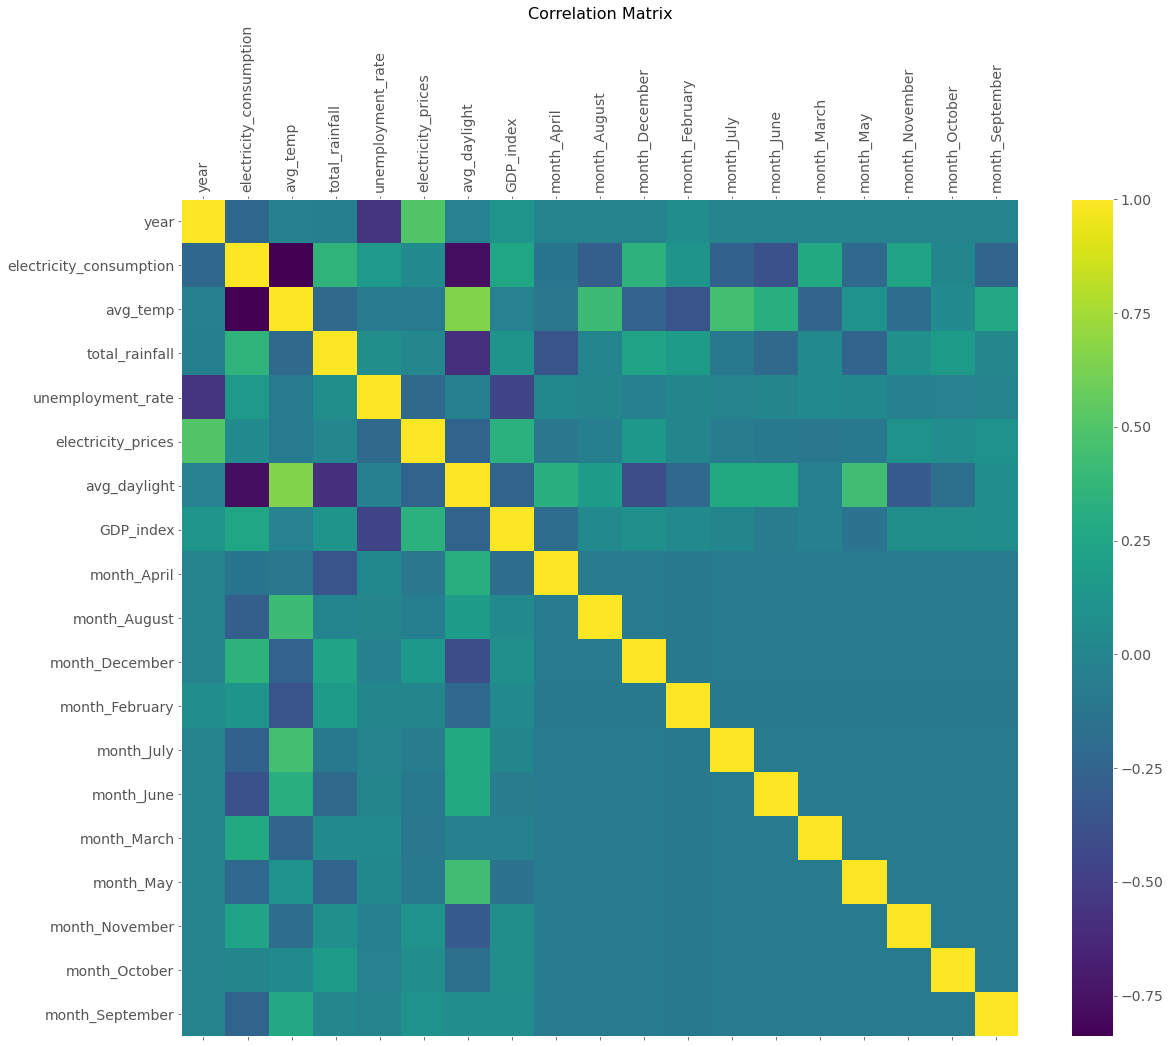

In [9]:
# 变量之间的相关性
df = pm_final
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=90)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

In [10]:
corr1 = df.corr()
print(corr1)

                                                            year  \
year                                                      1.0000   
electricity_consumption                                  -0.2200   
avg_temp                                                 -0.0328   
total_rainfall                                           -0.0468   
unemployment_rate                                        -0.5644   
electricity_prices                                        0.4998   
avg_daylight                                             -0.0269   
GDP_index                                                 0.1217   
month_April                                              -0.0134   
month_August                                             -0.0134   
month_December                                           -0.0134   
month_February                                            0.0631   
month_July                                               -0.0134   
month_June                                      

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X = add_constant(df)
vif_2 = pd.Series([variance_inflation_factor(X.values, i) 
           for i in range(X.shape[1])],
          index=X.columns)
vif_3 = vif_2.drop('const')
vif_4 = vif_3.drop('avg_temp')
vif_5 = vif_4.drop('electricity_consumption')
vif_6 = vif_5.drop('avg_daylight')
print(vif_6)

year                                                   4.3025
total_rainfall                                         2.3709
unemployment_rate                                      2.8039
electricity_prices                                     2.0023
GDP_index                                              3.9992
month_April                                           11.2602
month_August                                          18.3509
month_December                                         2.1228
month_February                                         6.0924
month_July                                            19.3635
month_June                                            19.5058
month_March                                            3.1180
month_May                                             14.1754
month_November                                         3.0715
month_October                                          6.8793
month_September                                       14.4503
dtype: f

In [12]:
# using VIF


#设定计算VIF的函数
# calculating VIF
# This function is adjusted from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: (default 5) the threshould VIF value. If the VIF of a variable is greater than thresh, it should be removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data. add_constant is a function from statsmodels (see the import above)
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        # If there are multiple variabels with VIF>thresh, only one of them is removed. This is because we want to keep as many variables as possible
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df


In [13]:
# 检查列
pm_final.columns

Index(['year', 'electricity_consumption', 'avg_temp', 'total_rainfall',
       'unemployment_rate', 'electricity_prices', 'avg_daylight', 'GDP_index',
       'month_April', 'month_August', 'month_December', 'month_February',
       'month_July', 'month_June', 'month_March', 'month_May',
       'month_November', 'month_October', 'month_September'],
      dtype='object')

In [14]:
# using VIF on the dataset
df_predictors_selected_VIF = drop_column_using_vif_(pm_final.drop('electricity_consumption', axis=1))

# Note that there is a 'while' loop in the drop_column_using_vif_. In each iteration, one variable is dropped.
print("The columns remaining after VIF selection are:")
print(df_predictors_selected_VIF.columns)

Dropping: avg_temp
Dropping: avg_daylight
The columns remaining after VIF selection are:
Index(['year', 'total_rainfall', 'unemployment_rate', 'electricity_prices',
       'GDP_index', 'month_April', 'month_August', 'month_December',
       'month_February', 'month_July', 'month_June', 'month_March',
       'month_May', 'month_November', 'month_October', 'month_September'],
      dtype='object')


In [15]:
# OLS

model_pm = sm.OLS(endog=pm_final[['electricity_consumption']], exog=sm.add_constant(df_predictors_selected_VIF)).fit()
model_pm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     electricity_consumption   R-squared:                       0.959
Model:                                 OLS   Adj. R-squared:                  0.950
Method:                      Least Squares   F-statistic:                     102.1
Date:                     Tue, 06 Dec 2022   Prob (F-statistic):           1.71e-41
Time:                             21:14:23   Log-Likelihood:                -58.646
No. Observations:                       86   AIC:                             151.3
Df Residuals:                           69   BIC:                             193.0
Df Model:                               16                                         
Covariance Type:                 nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                429.2221     86.616      4.955      0.000     256.427     602.017
year                  -0.2059      0.042     -4.851      0.000      -0.291      -0.121
total_rainfall        -0.0038      0.001     -3.043      0.003      -0.006      -0.001
unemployment_rate      0.6622      0.156      4.251      0.000       0.351       0.973
electricity_prices    -0.0040      0.002     -2.287      0.025      -0.007      -0.001
GDP_index              0.1367      0.016      8.647      0.000       0.105       0.168
month_April           -4.8180      0.313    -15.373      0.000      -5.443      -4.193
month_August          -6.1672      0.283    -21.822      0.000      -6.731      -5.603
month_December        -0.9297      0.280     -3.321      0.001      -1.488      -0.371
month_February        -2.8779      0.268    -10.738      0.000      -3.413      -2.343
month_July            -6.0456      0.288    -21.019      0.000      -6.619      -5.472
month_June            -6.8839      0.296    -23.223      0.000      -7.475      -6.293
month_March           -1.6105      0.282     -5.713      0.000      -2.173      -1.048
month_May             -5.4844      0.300    -18.263      0.000      -6.083      -4.885
month_November        -1.9512      0.279     -6.988      0.000      -2.508      -1.394
month_October         -3.7624      0.278    -13.537      0.000      -4.317      -3.208
month_September       -5.8607      0.281    -20.874      0.000      -6.421      -5.301
==============================================================================
Omnibus:                        4.507   Durbin-Watson:                   1.505
Prob(Omnibus):                  0.105   Jarque-Bera (JB):                5.842
Skew:                           0.015   Prob(JB):                       0.0539
Kurtosis:                       4.277   Cond. No.                     3.04e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.04e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
'''
result = model_pm.summary()
result_text = result.as_text()
resultFile = open("table2.csv",'w')
resultFile.write(result_text)
resultFile.close()
'''

'\nresult = model_pm.summary()\nresult_text = result.as_text()\nresultFile = open("table2.csv",\'w\')\nresultFile.write(result_text)\nresultFile.close()\n'

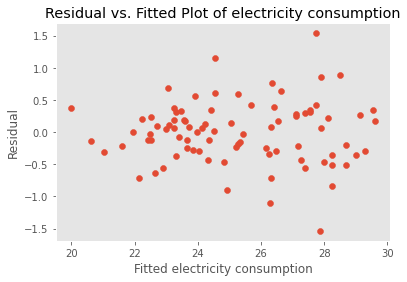

In [17]:
# plot 
plt.scatter(model_pm.fittedvalues, model_pm.resid)
# adding title and labels
plt.xlabel('Fitted electricity consumption')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot of electricity consumption')
plt.show()